### Importação dos dados



In [10]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [11]:
# Concatenando todas as lojas em um único DataFrame
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Conferindo o tamanho e primeiras linhas
print(df.shape)
df.head()


(9435, 12)


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [12]:
df['Faturamento'] = df['Preço']  # caso cada linha seja uma unidade
faturamento_total = df['Faturamento'].sum()
print(f"Faturamento Total: R$ {faturamento_total:,.2f}")

Faturamento Total: R$ 5,871,490.79


In [13]:
vendas_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum().sort_values(ascending=False)
vendas_categoria

,Faturamento
Categoria do Produto,
eletronicos,2214099.72
eletrodomesticos,1766337.03
moveis,1010214.00
instrumentos musicais,465029.67
esporte e lazer,190635.39
brinquedos,98140.86
utilidades domesticas,76773.38
livros,50260.74


# 2. Vendas por Categoria


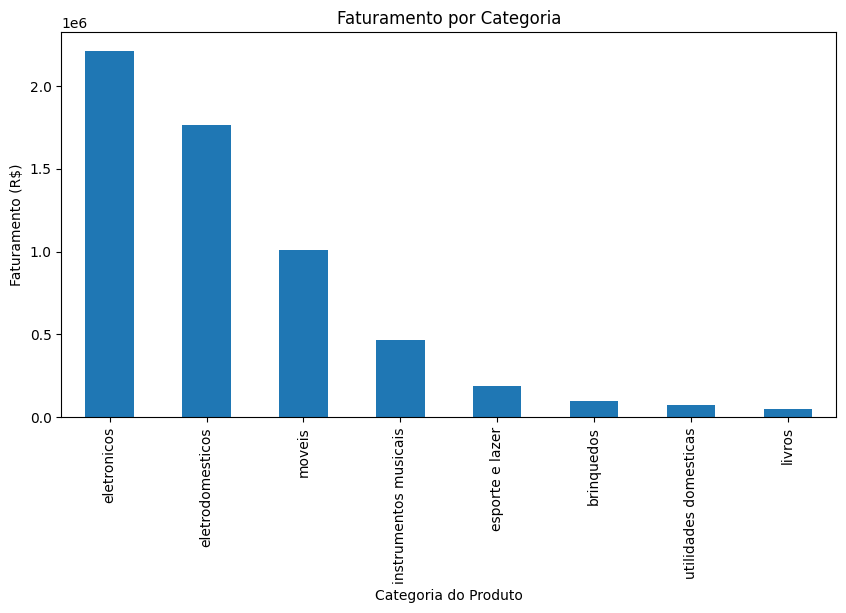

In [14]:
vendas_categoria.plot(kind='bar', figsize=(10,5), title='Faturamento por Categoria')
plt.ylabel('Faturamento (R$)')
plt.show()

# 3. Média de Avaliação das Lojas

In [15]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

media_avaliacao = df.groupby('Loja')['Avaliação da compra'].mean()
media_avaliacao

,Avaliação da compra
Loja,
Loja 1,3.976685
Loja 2,4.037304
Loja 3,4.048326
Loja 4,3.995759


# 4. Produtos Mais e Menos Vendidos

In [16]:
produtos_vendidos = df['Produto'].value_counts()
produto_mais_vendido = produtos_vendidos.idxmax()
produto_menos_vendido = produtos_vendidos.idxmin()

print("Produto mais vendido:", produto_mais_vendido)
print("Produto menos vendido:", produto_menos_vendido)

Produto mais vendido: Cômoda
Produto menos vendido: Celular ABXY


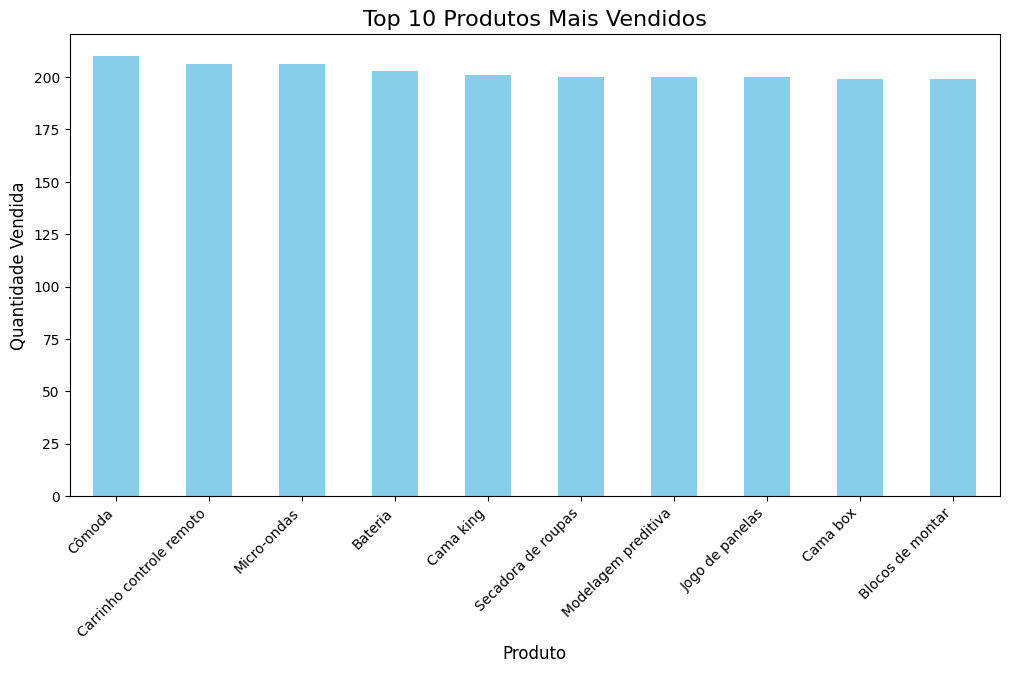

In [18]:
top10_produtos = df['Produto'].value_counts().head(10)

plt.figure(figsize=(12,6))
top10_produtos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos', fontsize=16)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Frete Médio por Loja


In [17]:
frete_medio_loja = df.groupby('Loja')['Frete'].mean()
frete_medio_loja

,Frete
Loja,
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


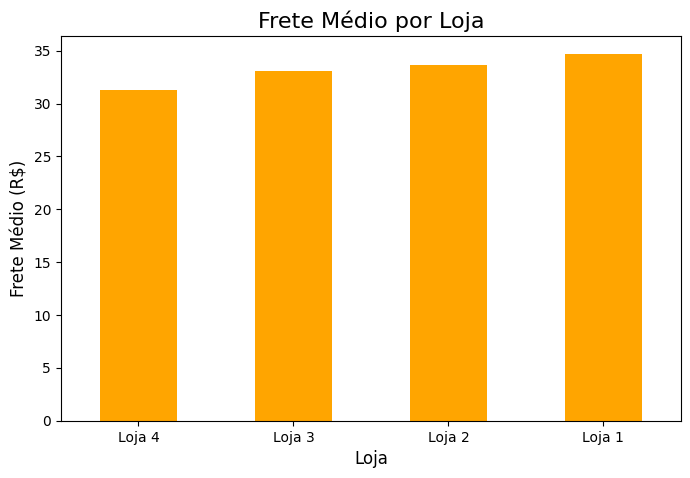

In [19]:
frete_medio_loja = df.groupby('Loja')['Frete'].mean().sort_values()

plt.figure(figsize=(8,5))
frete_medio_loja.plot(kind='bar', color='orange')
plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.show()
